In [1]:
!pip3 install torch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets


In [15]:
'''
Overview of make_circles

    Purpose: make_circles is primarily used for creating a toy dataset that can be used for testing and demonstrating algorithms in machine learning,
     particularly for classification tasks. It produces data that is not linearly separable, which is useful for evaluating models that can handle complex decision boundaries.
    Parameters:
        n_samples: This parameter specifies the total number of points to generate. The points will be evenly distributed between the two circles.
        random_state: This is an integer seed for random number generation, ensuring reproducibility of the dataset across different runs.
        noise: This parameter adds Gaussian noise to the data, making it more realistic by simulating real-world data imperfections.
        factor: This controls the distance between the two circles. A value of 0.0 creates two concentric circles with no space between them, while a value of 1.0 places them far apart.
'''
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [16]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

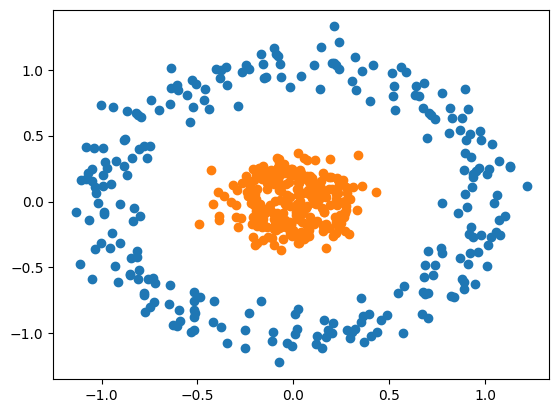

In [17]:
scatter_plot()

In [18]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size): #h1 is hiden leyer
    super().__init__()
    self.linear = nn.Linear(input_size, H1) # input at first go to hiden layer
    self.linear2 = nn.Linear(H1, output_size) # hidden layer is connected to an output
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


In [19]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [20]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
'''
Learning Rate Adaptation

    Adam: Utilizes adaptive learning rates for each parameter based on estimates of the first and second moments of the gradients. This means that the learning rate can change dynamically during training, allowing for more efficient convergence, especially in scenarios with sparse gradients or noisy data 1
    .
    SGD: Maintains a single, fixed learning rate for all parameters throughout training. While it can be adjusted manually (or via learning rate schedules), it does not inherently adapt to the characteristics of the gradients 1
    .

2. Stability and Performance

    Adam: Generally more stable than SGD, particularly in the presence of noisy gradients or non-convex loss functions. It is designed to handle irregularities in the loss landscape better, making it suitable for complex models and datasets 2
    .
    SGD: Can be less stable, especially with high learning rates or in complex optimization landscapes. However, it can achieve good results with proper tuning and techniques like momentum (e.g., Nesterov momentum) to improve convergence 1
    2
    .

3. Convergence Speed

    Adam: Often converges faster than SGD due to its adaptive nature, making it a popular choice for deep learning applications where rapid convergence is crucial 1
    .
    SGD: May require more epochs to converge and often benefits from careful tuning of the learning rate and other hyperparameters. However, it can sometimes yield better generalization performance on certain tasks once properly tuned 1
    .

4. Use Cases

    Adam: Recommended as a default optimizer for many deep learning tasks due to its ease of use and effectiveness across various problems 1
    . It is particularly favored in scenarios involving large models and datasets.
    SGD: While it may require more effort to tune, it is still widely used and can outperform Adam in some cases, especially when combined with techniques like momentum 2
    .
'''

In [21]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.7148520350456238
epoch: 1 loss 0.6947316527366638
epoch: 2 loss 0.6955162286758423
epoch: 3 loss 0.7014890909194946
epoch: 4 loss 0.7013982534408569
epoch: 5 loss 0.697470486164093
epoch: 6 loss 0.693925678730011
epoch: 7 loss 0.6928598284721375
epoch: 8 loss 0.6939383149147034
epoch: 9 loss 0.6954388618469238
epoch: 10 loss 0.6958757042884827
epoch: 11 loss 0.6949177384376526
epoch: 12 loss 0.6931492686271667
epoch: 13 loss 0.691389799118042
epoch: 14 loss 0.6901612281799316
epoch: 15 loss 0.6894590258598328
epoch: 16 loss 0.688843309879303
epoch: 17 loss 0.687766969203949
epoch: 18 loss 0.6859007477760315
epoch: 19 loss 0.6832481622695923
epoch: 20 loss 0.6800420880317688
epoch: 21 loss 0.6765591502189636
epoch: 22 loss 0.6729681491851807
epoch: 23 loss 0.6692697405815125
epoch: 24 loss 0.6653285622596741
epoch: 25 loss 0.6609662771224976
epoch: 26 loss 0.6560585498809814
epoch: 27 loss 0.6505835056304932
epoch: 28 loss 0.6446025967597961
epoch: 29 loss 0.638198196887

Text(0.5, 0, 'epoch')

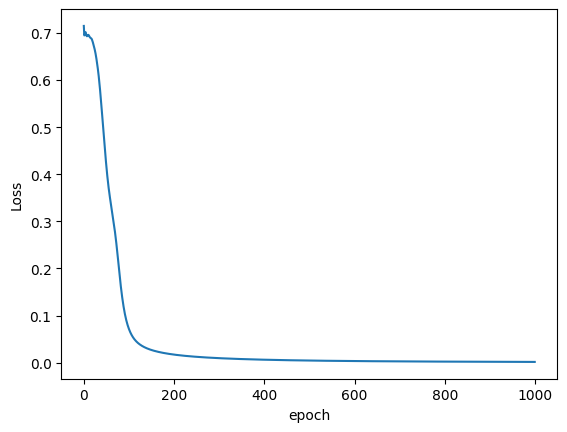

In [22]:

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [23]:


def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)



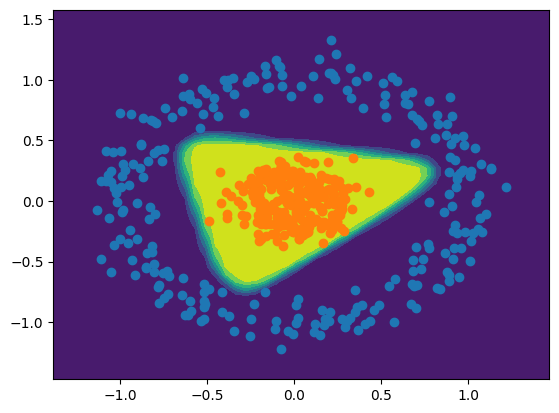

In [24]:

plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


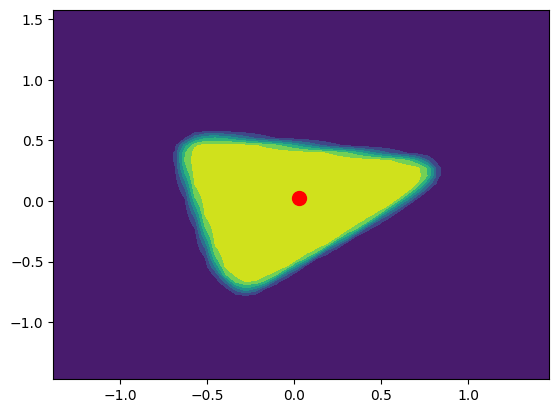

In [25]:


x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(X, y)

